In [2]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd

# Load the dataset
#data = np.loadtxt('house_price/kc_house_data.csv', delimiter=',',skiprows=1)
data= pd.read_csv("house_price/kc_house_data.csv")
data = data.drop(['id', 'date'], axis=1)

# Split the data into training and testing sets
train_data = data[:int(len(data)*0.8)].drop(["price","zipcode","waterfront"],axis=1)
train_data=(train_data-train_data.mean())/train_data.std()

train_labels = data[:int(len(data)*0.8)]["price"]
#train_labels = (train_labels-train_labels.mean())/train_labels.std()
test_data = data[int(len(data)*0.8):].drop(["price","zipcode","waterfront"],axis=1)
test_data=(test_data-test_data.mean())/test_data.std()

test_labels = data[int(len(data)*0.8):]["price"]
# Define placeholders for the inputs and labels
x = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.float32, [None, ])

# Define the model
W = tf.Variable(tf.zeros([16, 1]))
b = tf.Variable(tf.zeros([1]))
y_pred = tf.matmul(x, W) + b

# Define the loss function (mean squared error)
loss = tf.reduce_mean(tf.square(y - y_pred))

# Define the optimizer (gradient descent)
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

# Create a session and initialize the variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train the model
for i in range(10000):
    sess.run(train, feed_dict={x: train_data, y: train_labels})

# Evaluate the model on the test set
test_loss = sess.run(loss, feed_dict={x: test_data, y: test_labels})
print('Test loss:', test_loss)

KeyboardInterrupt: 

In [7]:
data[:int(len(data)*0.8)]["price"]

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
           ...    
17285     735000.0
17286     378000.0
17287     775000.0
17288    2250000.0
17289    1350000.0
Name: price, Length: 17290, dtype: float64

In [6]:
test_data-test_data.mean()/test_data.std()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17290,0.676334,0.227531,0.089634,-0.030763,-1.260204,-0.282918,-0.447655,0.081634,-0.442810,1.182407,-0.606618,-0.182242,1.112218,-0.212593,-0.016433,0.004704
17291,0.676334,0.227531,0.089634,-0.030763,-1.260204,-0.282918,-0.447655,0.081634,-0.442810,1.182407,-0.606618,-0.182242,1.112218,-0.212593,-0.016433,0.004704
17292,-0.427400,0.227531,-0.737865,-0.269964,0.445718,-0.282918,-0.447655,0.081634,-0.867274,0.154396,0.636339,-0.182242,-0.097497,1.433204,-0.771960,-0.336054
17293,-0.427400,-0.731471,-0.934396,0.084889,-1.260204,-0.282918,-0.447655,0.081634,-1.012485,0.007538,-0.312233,-0.182242,1.365084,0.938788,-1.197802,-0.008172
17294,0.676334,0.547199,0.668883,-0.113786,0.445718,-0.282918,-0.447655,0.081634,0.998132,-0.604374,0.636339,-0.182242,-0.553104,0.471463,1.096252,-0.104797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.427400,0.227531,-0.675803,-0.285909,2.151639,-0.282918,-0.447655,0.081634,-0.453980,-0.604374,0.767176,-0.182242,1.040398,-0.923740,-0.689539,-0.338498
21609,0.676334,0.227531,0.131009,-0.170701,0.445718,-0.282918,-0.447655,0.081634,0.417287,-0.604374,0.930723,-0.182242,-0.370562,-1.032105,-0.277433,-0.130913
21610,-1.531134,-2.010142,-1.203333,-0.280520,0.445718,-0.282918,-0.447655,-0.774926,-1.023655,-0.604374,0.767176,-0.182242,0.255617,-0.605417,-1.390118,-0.320333
21611,-0.427400,0.227531,-0.603396,-0.254978,0.445718,-0.282918,-0.447655,0.081634,-0.375789,-0.604374,0.603629,-0.182242,-0.192509,0.952333,-0.854381,-0.346595


In [22]:
#Solution using tensorflow (generated by ChatGPT, may contain errors)

import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.disable_v2_behavior()
# Load data
data = pd.read_csv('house_price/kc_house_data.csv')


In [23]:
data.shape

(21613, 21)

In [24]:
x_train = data['sqft_living'].values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)


In [25]:
x_train.shape

(21613, 1)

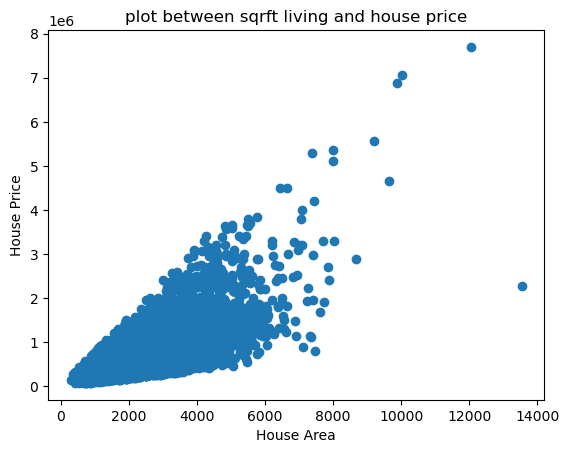

In [26]:
plt.scatter(x=x_train, y=y_train)
plt.xlabel("House Area")
plt.ylabel("House Price")
plt.title("plot between sqrft living and house price")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [28]:
X_train = (X_train-X_train.mean())/X_train.std()


In [29]:
X_train.shape

(17290, 1)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100)

Train on 17290 samples
Epoch 1/100
 4320/17290 [======>.......................] - ETA: 0s - loss: 331674968670.8148

2023-03-07 16:54:19.145009: W tensorflow/c/c_api.cc:291] Operation '{name:'training_2/SGD/momentum/Assign' id:490 op device:{requested: '', assigned: ''} def:{{{node training_2/SGD/momentum/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/SGD/momentum, training_2/SGD/momentum/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


17290/17290 [==============================] - 1s 29us/sample - loss: 211059013204.3956
Epoch 2/100
17290/17290 [==============================] - 0s 24us/sample - loss: 83047764640.3220
Epoch 3/100
17290/17290 [==============================] - 0s 25us/sample - loss: 68264367414.6943
Epoch 4/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66566229615.1653
Epoch 5/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66381360282.3403
Epoch 6/100
17290/17290 [==============================] - 0s 26us/sample - loss: 66356304806.5703
Epoch 7/100
17290/17290 [==============================] - 0s 25us/sample - loss: 66351991834.6513
Epoch 8/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66360208658.4486
Epoch 9/100
17290/17290 [==============================] - 0s 25us/sample - loss: 66345155897.5371
Epoch 10/100
17290/17290 [==============================] - 0s 25us/sample - loss: 66350019500.9666
Epoch 11/100
17290/1

17290/17290 [==============================] - 0s 24us/sample - loss: 66357806580.6880
Epoch 84/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66356909933.3589
Epoch 85/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66358177192.1693
Epoch 86/100
17290/17290 [==============================] - 0s 24us/sample - loss: 66351342906.4847
Epoch 87/100
17290/17290 [==============================] - 0s 26us/sample - loss: 66355515639.7973
Epoch 88/100
17290/17290 [==============================] - 1s 31us/sample - loss: 66352733472.6626
Epoch 89/100
17290/17290 [==============================] - 1s 30us/sample - loss: 66347488966.1076
Epoch 90/100
17290/17290 [==============================] - 1s 31us/sample - loss: 66353245164.4558
Epoch 91/100
17290/17290 [==============================] - 1s 33us/sample - loss: 66349835636.2883
Epoch 92/100
17290/17290 [==============================] - 0s 26us/sample - loss: 66356602834.2783
Epoch 93/100


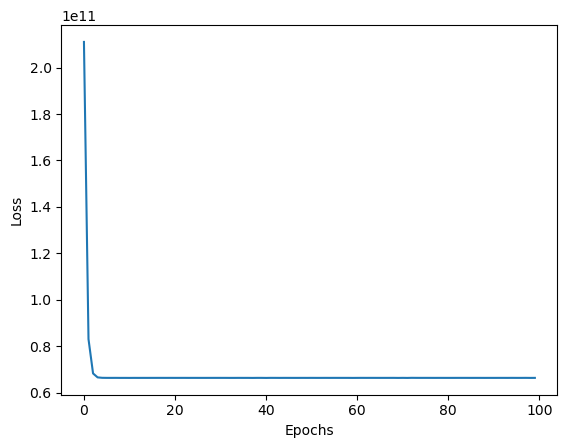

Predicted prices:
House size: 1400 sqft, Predicted price: 354833568.0
House size: 1600 sqft, Predicted price: 405447232.0


/home/nouman/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-07 16:56:35.772352: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3/BiasAdd' id:379 op device:{requested: '', assigned: ''} def:{{{node dense_3/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_3/MatMul, dense_3/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [32]:
# Plot loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict house price for new data
x_new = np.array([[1400], [1600]])
y_pred = model.predict(x_new)

print('Predicted prices:')
for i in range(len(x_new)):
    print(f'House size: {x_new[i][0]} sqft, Predicted price: {y_pred[i][0]}')


In [33]:
y_pred= model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

532423125.4584779

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-2265751.488005296